In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#预设导入
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import joblib
import re
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Embedding

import warnings
warnings.filterwarnings("ignore")

#机器学习导入
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score
from sklearn import ensemble
from sklearn import neighbors
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
model = Sequential()
model.add(Embedding(2, 2, input_length=7))#输入维，输出维
model.compile('rmsprop', 'mse')
model.predict(np.array([[0,1,0,1,1,0,0]]))


W1023 11:09:44.072127 11864 deprecation_wrapper.py:119] From C:\Users\89201\Anaconda2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1023 11:09:44.169888 11864 deprecation_wrapper.py:119] From C:\Users\89201\Anaconda2\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1023 11:09:44.251644 11864 deprecation_wrapper.py:119] From C:\Users\89201\Anaconda2\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1023 11:09:44.315440 11864 deprecation_wrapper.py:119] From C:\Users\89201\Anaconda2\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1023 11:09:44.319430 11864 deprecation_wrapper.py:119] From C:\Users\89201\Anaconda2\lib\site-pac

array([[[-0.03739153,  0.00756855],
        [-0.04779572, -0.004924  ],
        [-0.03739153,  0.00756855],
        [-0.04779572, -0.004924  ],
        [-0.04779572, -0.004924  ],
        [-0.03739153,  0.00756855],
        [-0.03739153,  0.00756855]]], dtype=float32)

In [ ]:


model = Sequential()
model.add(Dense(output_dim=(),input_dim=())) # 第一层需要定义
model.add(Dense(output_dim=())) # 默认第二层的输入就是第一层的输出
model.compile(loss='mse',optimizer='sgd')

# 训练
for step in range(1000):
    cost = model.train_on_batch(X_train,Y_train)
    if step % 100 == 0:
    print('train cost',cost)
# 评估   
cost = model.evaluate(X_test,Y_test,batch_size=40)
# 打印权重
W,b = model.layer[0].get_weights()
# 预测
Y_pred= model.predict(X_tests)

In [ ]:
pd.set_option('max_colwidth',200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [6]:
pd.set_option('max_colwidth',200)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows',60)

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_test=pd.read_csv("test.csv")

In [9]:
df_train.columns


Index(['id', '賃料', '所在地', 'アクセス', '間取り', '築年数', '方角', '面積', '所在階', 'バス・トイレ',
       'キッチン', '放送・通信', '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間'],
      dtype='object')

In [19]:
outputtrain=pd.concat([df_train['id'],df_train['所在地']],axis=1)
outputtrain=outputtrain.set_index(['id'])

In [21]:
outputtrain.to_csv('outputtrain.csv',index=True)
#access_line_1.to_csv('access_line_test.csv',index=True)

In [5]:
df_train.columns=['id','SalePrice','address', 'access', 'RLDK', 'age', 'direction', 'area', 'floor', 'bath_toilet','kitchen', 'internet_communication', 'facilities', 'parking', 'Surrounding_environment', 'BuildingConstruction', 'ContractPeriod']
df_train=df_train.set_index(['id'])

In [6]:
df_test.columns=['id','address', 'access', 'RLDK', 'age', 'direction', 'area', 'floor', 'bath_toilet','kitchen', 'internet_communication', 'facilities', 'parking', 'Surrounding_environment', 'BuildingConstruction', 'ContractPeriod']
df_test=df_test.set_index(['id'])

In [9]:
#按列名排序
order = df_train.columns
df = df_train[order]
df

,SalePrice,address,access,RLDK,age,direction,area,floor,bath_toilet,kitchen,internet_communication,facilities,parking,Surrounding_environment,BuildingConstruction,ContractPeriod
id,,,,,,,,,,,,,,,,
1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間
6,160000,東京都荒川区南千住５丁目,常磐線快速\t南千住駅\t徒歩2分\t\t都電荒川線\t三ノ輪橋駅\t徒歩10分\t\t日比...,2LDK,7年6ヶ月,東,50.8m2,6階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,"駐輪場\t空有\t駐車場\t近隣\t27,000円(税込)\t距離150m\tバイク置き場\t無",【スーパー】 251m\t【コンビニ】 376m,RC（鉄筋コンクリート）,2年間
7,78500,東京都練馬区東大泉３丁目,西武池袋線\t大泉学園駅\t徒歩4分\t\t西武池袋線\t保谷駅\t徒歩25分\t\t東武東...,1K,10年5ヶ月,南,23.82m2,6階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,"駐輪場\t空有\t駐車場\t近隣\t16,000円(税込)\t距離200m\tバイク置き場\t無",【スーパー】 812m\t【コンビニ】 149m\t【コンビニ】 942m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間
8,115000,東京都目黒区鷹番１丁目,東急東横線\t学芸大学駅\t徒歩7分\t\t東急東横線\t都立大学駅\t徒歩16分\t\t東...,1K,14年4ヶ月,NaN,32.32m2,1階／6階建,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,NaN,【スーパー】 334m\t【スーパー】 562m\t【スーパー】 694m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
9,184327,東京都文京区向丘１丁目,南北線\t東大前駅\t徒歩3分\t\t都営三田線\t白山(東京都)駅\t徒歩10分\t\t千...,2DK,44年8ヶ月,北西,65.59m2,4階／9階建,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t洗面台独立,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯,NaN,エアコン付\tバルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t都市ガス,駐車場\t無,NaN,SRC（鉄骨鉄筋コンクリート）,2年間


In [22]:
df_test.loc[[40675]]

,address,access,RLDK,age,direction,area,floor,bath_toilet,kitchen,internet_communication,facilities,parking,Surrounding_environment,BuildingConstruction,ContractPeriod
id,,,,,,,,,,,,,,,
40675,東京都江戸川区宇喜田町1469-35,都営新宿線\t船堀駅\t徒歩11分\t\t東西線\t西葛西駅\t徒歩20分\t\t東西線\t...,3LDK,0年4ヶ月,南西,94.91m2,NaN,バス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台...,システムキッチン\t／\tL字キッチン,NaN,バルコニー／\tルーフバルコニー\t／\tフローリング,NaN,NaN,鉄骨造,2年間


In [ ]:
df_train['access'].value_counts()

# access

In [61]:
df_access=df_test['access'].str.replace(r'（\S+）', '')
df_access=df_access.str.replace(r'\(\S+\)', '')
df_access=df_access.str.replace(r'(東京メトロ)', '')
df_access=df_access.str.replace(r'・', '-')
df_access=df_access.str.replace(r'\(\S+\)', '')
df_access=df_access.str.split('\t\t',expand=True)
df_access

,0,1,2,3
id,,,,
31471,東急大井町線\t等々力駅\t徒歩15分,東急田園都市線\t桜新町駅\t徒歩24分,東急東横線\t自由が丘駅\t徒歩27分,None
31472,東急東横線\t都立大学駅\t徒歩6分,東急東横線\t自由が丘駅\t徒歩17分,東急大井町線\t自由が丘駅\t徒歩17分,None
31473,東武東上線\t北池袋駅\t徒歩10分,埼京線\t板橋駅\t徒歩16分,山手線\t池袋駅\t徒歩19分,None
31474,丸ノ内線\t方南町駅\t徒歩10分,京王線\t代田橋駅\t徒歩8分,京王井の頭線\t明大前駅\t徒歩17分,None
31475,丸ノ内線\t方南町駅\t徒歩12分,丸ノ内線\t新高円寺駅\t徒歩17分,丸ノ内線\t東高円寺駅\t徒歩18分,None
31476,都営大江戸線\t西新宿五丁目駅\t徒歩4分,都営大江戸線\t都庁前駅\t徒歩8分,丸ノ内線\t西新宿駅\t徒歩11分,None
31477,山手線\t浜松町駅\t徒歩10分,山手線\t田町駅\t徒歩10分,都営浅草線\t三田駅\t徒歩7分,None
31478,京王新線\t幡ケ谷駅\t徒歩11分,都営大江戸線\t西新宿五丁目駅\t徒歩13分,京王新線\t初台駅\t徒歩15分,京王線 初台駅
31479,総武線-中央線\t新小岩駅\t徒歩18分,総武線-中央線\t平井駅\t徒歩34分,京成押上線\t四ツ木駅\t徒歩22分,None


In [12]:
df_access[3].value_counts()

NameError: name 'df_access' is not defined

In [63]:
df_access_0=df_access[0].str.split('\t',expand=True)
df_access_0_1=df_access_0[0].str.split('-',expand=True)
df_access_0_help=pd.merge(df_access_0_1,df_access_0[1],on='id')
df_access_0=pd.merge(df_access_0_help,df_access_0[2],on='id')
df_access_0.columns=["route1","route2","station","time"]
df_access_0["time"]=df_access_0["time"].str.extract(r'^徒歩(\d+)分')
df_access_0["time"]=pd.to_numeric(df_access_0["time"])

df_access_0

,route1,route2,station,time
id,,,,
31471,東急大井町線,None,等々力駅,15.0
31472,東急東横線,None,都立大学駅,6.0
31473,東武東上線,None,北池袋駅,10.0
31474,丸ノ内線,None,方南町駅,10.0
31475,丸ノ内線,None,方南町駅,12.0
31476,都営大江戸線,None,西新宿五丁目駅,4.0
31477,山手線,None,浜松町駅,10.0
31478,京王新線,None,幡ケ谷駅,11.0
31479,総武線,中央線,新小岩駅,18.0


In [ ]:
df_access_0["time"].value_counts()

In [64]:
df_access_1=df_access[1].str.split('\t',expand=True)
df_access_1_1=df_access_1[0].str.split('-',expand=True)
df_access_1_help=pd.merge(df_access_1_1,df_access_1[1],on='id')
df_access_1=pd.merge(df_access_1_help,df_access_1[2],on='id')
df_access_1.columns=["route1","route2","station","time"]
df_access_1["time"]=df_access_1["time"].str.extract(r'^徒歩(\d+)分')
df_access_1["time"]=pd.to_numeric(df_access_1["time"])

df_access_1

,route1,route2,station,time
id,,,,
31471,東急田園都市線,None,桜新町駅,24.0
31472,東急東横線,None,自由が丘駅,17.0
31473,埼京線,None,板橋駅,16.0
31474,京王線,None,代田橋駅,8.0
31475,丸ノ内線,None,新高円寺駅,17.0
31476,都営大江戸線,None,都庁前駅,8.0
31477,山手線,None,田町駅,10.0
31478,都営大江戸線,None,西新宿五丁目駅,13.0
31479,総武線,中央線,平井駅,34.0


In [ ]:
df_access_1["route1"].value_counts()

In [65]:
df_access_2=df_access[2].str.split('\t',expand=True)
df_access_2_1=df_access_2[0].str.split('-',expand=True)
df_access_2_help=pd.merge(df_access_2_1,df_access_2[1],on='id')
df_access_2=pd.merge(df_access_2_help,df_access_2[2],on='id')
df_access_2.columns=["route1","route2","station","time"]
df_access_2["time"]=df_access_2["time"].str.extract(r'^徒歩(\d+)分')
df_access_2["time"]=pd.to_numeric(df_access_2["time"])

df_access_2

,route1,route2,station,time
id,,,,
31471,東急東横線,None,自由が丘駅,27.0
31472,東急大井町線,None,自由が丘駅,17.0
31473,山手線,None,池袋駅,19.0
31474,京王井の頭線,None,明大前駅,17.0
31475,丸ノ内線,None,東高円寺駅,18.0
31476,丸ノ内線,None,西新宿駅,11.0
31477,都営浅草線,None,三田駅,7.0
31478,京王新線,None,初台駅,15.0
31479,京成押上線,None,四ツ木駅,22.0


In [ ]:
df_access_2["route2"].value_counts()

In [66]:
df_access_2_r2help=df_access_2["route2"].str.extract(r'^(\S+線|ゆりかもめ|\S+ライン|つくばエクスプレス)(\S+駅)徒歩(\d+)分', \
                                                     expand=True)
df_access_2_r2help.columns=["route2","station","time"]


df_access_2_r2help

,route2,station,time
id,,,
31471,NaN,NaN,NaN
31472,NaN,NaN,NaN
31473,NaN,NaN,NaN
31474,NaN,NaN,NaN
31475,NaN,NaN,NaN
31476,NaN,NaN,NaN
31477,NaN,NaN,NaN
31478,NaN,NaN,NaN
31479,NaN,NaN,NaN


In [67]:
df_access_2["route2"]=df_access_2["route2"].str.extract(r'^(中央線|舎人ライナー)', expand=True)
df_access_2["route2"]=df_access_2["route2"].combine_first(df_access_2_r2help["route2"])
df_access_2["station"]=df_access_2["station"].combine_first(df_access_2_r2help["station"])
df_access_2["time"]=df_access_2["time"].combine_first(df_access_2_r2help["time"])

df_access_2

,route1,route2,station,time
id,,,,
31471,東急東横線,NaN,自由が丘駅,27
31472,東急大井町線,NaN,自由が丘駅,17
31473,山手線,NaN,池袋駅,19
31474,京王井の頭線,NaN,明大前駅,17
31475,丸ノ内線,NaN,東高円寺駅,18
31476,丸ノ内線,NaN,西新宿駅,11
31477,都営浅草線,NaN,三田駅,7
31478,京王新線,NaN,初台駅,15
31479,京成押上線,NaN,四ツ木駅,22


In [68]:
df_access_2_r1help=df_access_2["route1"].str.extract(r'^(\S+線|ゆりかもめ|\S+ライン|つくばエクスプレス)(\S+駅)徒歩(\d+)分', \
                                                     expand=True)
df_access_2_r1help.columns=["route1","station","time"]

df_access_2["route1"]=df_access_2["route1"].str.extract(r'^(\S+線|ゆりかもめ|\S+ライン|つくばエクスプレス)', expand=True)
df_access_2["route1"]=df_access_2["route1"].combine_first(df_access_2_r1help["route1"])
df_access_2["station"]=df_access_2["station"].combine_first(df_access_2_r1help["station"])

df_access_2_r1help["time"]=pd.to_numeric(df_access_2_r1help["time"])
df_access_2["time"]=df_access_2["time"].combine_first(df_access_2_r1help["time"])

df_access_2

,route1,route2,station,time
id,,,,
31471,東急東横線,NaN,自由が丘駅,27
31472,東急大井町線,NaN,自由が丘駅,17
31473,山手線,NaN,池袋駅,19
31474,京王井の頭線,NaN,明大前駅,17
31475,丸ノ内線,NaN,東高円寺駅,18
31476,丸ノ内線,NaN,西新宿駅,11
31477,都営浅草線,NaN,三田駅,7
31478,京王新線,NaN,初台駅,15
31479,京成押上線,NaN,四ツ木駅,22


In [ ]:
df_access_2

In [ ]:
for i,num in enumerate(df_access_2_r2help["route2"]):
    if num == "豊島線":
        print(i+1)

In [ ]:
#第三列实在太杂乱了 所以全部删除

In [69]:
#线路合并
access_line_1=pd.get_dummies(df_access_0["route1"])

access_line_1_2=pd.get_dummies(df_access_0["route2"])

access_line_1["中央線"]=access_line_1["中央線"]+access_line_1_2["中央線"]
access_line_1=pd.merge(access_line_1,access_line_1_2["舎人ライナー"],on='id')
access_line_1

,つくばエクスプレス,ゆりかもめ,りんかい線,中央本線,中央線,丸ノ内線,京急本線,京急空港線,京成押上線,京成本線,...,西武池袋線,西武豊島線,都営三田線,都営大江戸線,都営新宿線,都営浅草線,都電荒川線,銀座線,高崎線,舎人ライナー
id,,,,,,,,,,,,,,,,,,,,,
31471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31474,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31475,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31479,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
access_line_2=pd.get_dummies(df_access_1["route1"])
access_line_2_2=pd.get_dummies(df_access_1["route2"])

access_line_2["中央線"]=access_line_2["中央線"]+access_line_2_2["中央線"]
access_line_2=pd.merge(access_line_2,access_line_2_2["舎人ライナー"],on='id')
access_line_2

,つくばエクスプレス,ゆりかもめ,りんかい線,ディズニーリゾートライン,中央線,丸ノ内線,京急大師線,京急本線,京急空港線,京成押上線,...,西武池袋線,西武豊島線,都営三田線,都営大江戸線,都営新宿線,都営浅草線,都電荒川線,銀座線,高崎線,舎人ライナー
id,,,,,,,,,,,,,,,,,,,,,
31471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31475,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31479,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
for index,rows in access_line_2.iteritems():#按列遍历
    if index in access_line_1.columns:
        access_line_1[index]=access_line_1[index]+access_line_2[index]
    else:
        access_line_1=pd.merge(access_line_1,access_line_2[index],on='id')
access_line_1

,つくばエクスプレス,ゆりかもめ,りんかい線,中央本線,中央線,丸ノ内線,京急本線,京急空港線,京成押上線,京成本線,...,都営新宿線,都営浅草線,都電荒川線,銀座線,高崎線,舎人ライナー,ディズニーリゾートライン,京急大師線,南武線,小76／松本橋東詰 6分
id,,,,,,,,,,,,,,,,,,,,,
31471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31474,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31475,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31479,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
access_line_3=pd.get_dummies(df_access_2["route1"])

access_line_3_2=pd.get_dummies(df_access_2["route2"])


for index,rows in access_line_3_2.iteritems():#按列遍历
    if index in access_line_3.columns:
        access_line_3[index]=access_line_3[index]+access_line_3_2[index]
    else:
        access_line_3=pd.merge(access_line_3,access_line_3_2[index],on='id')
access_line_3

,つくばエクスプレス,ゆりかもめ,りんかい線,ディズニーリゾートライン,三田線,中央本線,中央線,丸ノ内線,京急大師線,京急本線,...,都営大江戸線,都営新宿線,都営浅草線,都電荒川線,銀座線,高崎線,根岸線,総武緩行線,舎人ライナー,豊島線
id,,,,,,,,,,,,,,,,,,,,,
31471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31475,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
31476,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
31477,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
31478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
for index,rows in access_line_3.iteritems():#按列遍历 这里的遍历index是列名 和enum什么的遍历不一样
    if index in access_line_1.columns:
        access_line_1[index]=access_line_1[index]+access_line_3[index]
    else:
        access_line_1=pd.merge(access_line_1,access_line_3[index],on='id')
access_line_1

,つくばエクスプレス,ゆりかもめ,りんかい線,中央本線,中央線,丸ノ内線,京急本線,京急空港線,京成押上線,京成本線,...,三田線,京成成田空港線,京王電鉄井の頭線,小田急電鉄小田原線,新京成線,東北新幹線,武蔵野線,根岸線,総武緩行線,豊島線
id,,,,,,,,,,,,,,,,,,,,,
31471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31474,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31475,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31476,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31479,0,0,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
access_line_1["小田急小田原線"]=access_line_1["小田急小田原線"]+access_line_1["小田急電鉄小田原線"]
del access_line_1["小田急電鉄小田原線"]

access_line_1["都営三田線"]=access_line_1["都営三田線"]+access_line_1["三田線"]
del access_line_1["三田線"]
del access_line_1["大師線"]#不确定是京急还是京武

KeyError: '大師線'

In [76]:
#test only
del access_line_1["小76／松本橋東詰　6分"]

In [77]:
access_line_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31262 entries, 31471 to 62732
Data columns (total 74 columns):
つくばエクスプレス       31262 non-null uint8
ゆりかもめ           31262 non-null uint8
りんかい線           31262 non-null uint8
中央本線            31262 non-null uint8
中央線             31262 non-null uint8
丸ノ内線            31262 non-null uint8
京急本線            31262 non-null uint8
京急空港線           31262 non-null uint8
京成押上線           31262 non-null uint8
京成本線            31262 non-null uint8
京成金町線           31262 non-null uint8
京浜東北線           31262 non-null uint8
京王井の頭線          31262 non-null uint8
京王新線            31262 non-null uint8
京王線             31262 non-null uint8
京葉線             31262 non-null uint8
副都心線            31262 non-null uint8
北総線             31262 non-null uint8
千代田線            31262 non-null uint8
半蔵門線            31262 non-null uint8
南北線             31262 non-null uint8
埼京線             31262 non-null uint8
埼玉高速鉄道線         31262 non-null uint8
小田急小田原線         31262 non-null uint8

In [ ]:
#按站提取时间

In [78]:
access_time_1=df_access_1["time"]
access_time=pd.concat([df_access_0["time"],df_access_1["time"],df_access_2["time"]],axis=0).to_frame()
#access_time=pd.merge(df_access_0["time"],df_access_1["time"],on='id')
access_time["time"]=pd.to_numeric(access_time["time"])
access_time.describe()
#1-7 4
#8-11 3
#12-15 2
#16+ 1
#else 0

,time
count,87606.000000
mean,11.622263
std,6.814941
min,1.000000
25%,7.000000
50%,10.000000
75%,15.000000
max,168.000000


In [85]:
access_time_1=pd.to_numeric(df_access_0["time"])
access_time_2=pd.to_numeric(df_access_1["time"])
access_time_3=pd.to_numeric(df_access_2["time"])

#access_station_1=pd.merge(df_access_2_help,df_access_2[2],on='id')

#access_line_1_2=pd.get_dummies(df_access_0["route2"])
type(access_time_1)

pandas.core.series.Series

In [86]:
access_time_1.index

Int64Index([31471, 31472, 31473, 31474, 31475, 31476, 31477, 31478, 31479,
            31480,
            ...
            62723, 62724, 62725, 62726, 62727, 62728, 62729, 62730, 62731,
            62732],
           dtype='int64', name='id', length=31262)

In [81]:
access_time=pd.Series(None,index=range(1,31471))
access_time[31470]

nan

In [52]:
#测试乘法
text_S=pd.Series([6,4,5],index=range(1,4))
text_D = pd.DataFrame({'A': [1,0,0],'B': [0,0,1],'C': [0,1,0],'D': [0,0,1]},index=[1,2,3])
text_D=text_D.mul(text_S,axis=0)
text_D

,A,B,C,D
1,6,0,0,0
2,0,0,4,0
3,0,5,0,5


In [87]:
access_time=pd.Series(None,index=range(31471,62733))
for index,num in enumerate(access_time_1):#enumerate默认从0开始遍历 不是根据id遍历 start=1 可以改成从1开始。非连续数的时候怎么办呢
    if (num>=1 and num<=7):
        access_time[index+31471]=4
    elif (num>7 and num<=11):
        access_time[index+31471]=3
    elif (num>11 and num<=15):
        access_time[index+31471]=2
    elif (num>15):
        access_time[index+31471]=1
    else:
        access_time[index+31471]=0
#access_time

access_station_1=pd.get_dummies(df_access_0["station"])
access_station_1=access_station_1.mul(access_time,axis=0)
access_station_1


,お台場海浜公園駅,お花茶屋駅,とうきょうスカイツリー駅,ときわ台駅,みずほ台駅,一之江駅,三ノ輪駅,三河島駅,三田駅,三越前駅,...,高輪台駅,高野駅,鬼子母神前駅,鮫洲駅,鵜の木駅,鶯谷駅,鶴瀬駅,鷺ノ宮駅,麹町駅,麻布十番駅
id,,,,,,,,,,,,,,,,,,,,,
31471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
access_station_3.describe()

,お台場海浜公園駅,お花茶屋駅,つつじケ丘駅,とうきょうスカイツリー駅,ときわ台駅,ひばりケ丘駅,一之江駅,三ノ輪橋駅,三ノ輪駅,三河島駅,...,高田馬場駅,高輪台駅,高野駅,鬼子母神前駅,鮫洲駅,鵜の木駅,鶯谷駅,鷺ノ宮駅,麹町駅,麻布十番駅
count,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,...,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000
mean,0.000576,0.003934,0.000704,0.005726,0.002879,0.000096,0.003199,0.006302,0.003519,0.007037,...,0.003934,0.003263,0.001375,0.000512,0.003615,0.001088,0.005214,0.003007,0.000736,0.004766
std,0.033930,0.072102,0.026519,0.128722,0.074978,0.009796,0.056468,0.142832,0.091480,0.141561,...,0.103444,0.089725,0.057939,0.037513,0.097732,0.057668,0.108520,0.073247,0.049625,0.108541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [89]:
access_time=pd.Series(None,index=range(31471,62733))
for index,num in enumerate(access_time_2):
    if (num>=1 and num<=7):
        access_time[index+31471]=4
    elif (num>7 and num<=31471):
        access_time[index+31471]=3
    elif (num>11 and num<=15):
        access_time[index+31471]=2
    elif (num>15):
        access_time[index+31471]=1
    else:
        access_time[index+31471]=0
#access_time

access_station_2=pd.get_dummies(df_access_1["station"])
access_station_2=access_station_2.mul(access_time,axis=0)
access_station_2


,お花茶屋駅,つつじケ丘駅,とうきょうスカイツリー駅,ときわ台駅,ひばりケ丘駅,一之江駅,三ノ輪橋駅,三ノ輪駅,三河島駅,三田駅,...,高輪台駅,高野駅,鬼子母神前駅,鮫洲駅,鵜の木駅,鶯谷駅,鷺ノ宮駅,鹿島田駅,麹町駅,麻布十番駅
id,,,,,,,,,,,,,,,,,,,,,
31471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
access_time=pd.Series(None,index=range(31471,62733))
for index,num in enumerate(access_time_3):
    if (num>=1 and num<=7):
        access_time[index+31471]=4
    elif (num>7 and num<=11):
        access_time[index+31471]=3
    elif (num>11 and num<=15):
        access_time[index+31471]=2
    elif (num>15):
        access_time[index+31471]=1
    else:
        access_time[index+31471]=0
#access_time

access_station_3=pd.get_dummies(df_access_2["station"])
access_station_3=access_station_3.mul(access_time,axis=0)
access_station_3

,お台場海浜公園駅,お花茶屋駅,つつじケ丘駅,とうきょうスカイツリー駅,ときわ台駅,ひばりケ丘駅,一之江駅,三ノ輪橋駅,三ノ輪駅,三河島駅,...,高田馬場駅,高輪台駅,高野駅,鬼子母神前駅,鮫洲駅,鵜の木駅,鶯谷駅,鷺ノ宮駅,麹町駅,麻布十番駅
id,,,,,,,,,,,,,,,,,,,,,
31471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
access_station_3['お台場海浜公園駅'][1]=max(access_station_3['お台場海浜公園駅'][1],access_station_2['お台場海浜公園駅'][1])

In [57]:
access_station_3.describe()

,お台場海浜公園駅,お花茶屋駅,つつじケ丘駅,とうきょうスカイツリー駅,ときわ台駅,ひばりケ丘駅,一之江駅,三ノ輪橋駅,三ノ輪駅,三河島駅,...,高田馬場駅,高輪台駅,高野駅,鬼子母神前駅,鮫洲駅,鵜の木駅,鶯谷駅,鷺ノ宮駅,麹町駅,麻布十番駅
count,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,...,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000
mean,0.000318,0.004194,0.000922,0.005021,0.002383,0.000318,0.003368,0.005529,0.004290,0.005910,...,0.004766,0.003686,0.001112,0.000731,0.003908,0.001398,0.004957,0.003209,0.001080,0.005243
std,0.025208,0.072508,0.030343,0.119742,0.063483,0.017823,0.058486,0.129659,0.099639,0.131588,...,0.113485,0.098541,0.052568,0.050729,0.102174,0.065725,0.106842,0.073645,0.056922,0.111913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,1.000000,4.000000,4.000000,1.000000,2.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000


In [93]:
for index_name,colu in access_station_2.iteritems():#按列遍历 列名index_name colu
    if index_name in access_station_1.columns:#2表中列在1表中
        for index_id,row in enumerate(access_station_1[index_name],start=31471):#按行遍历 index_id 下标从1开始
            access_station_1[index_name][index_id]=max(access_station_1[index_name][index_id],access_station_2[index_name][index_id])
    else:
        access_station_1=pd.merge(access_station_1,access_station_2[index_name],on='id')
access_station_1

,お台場海浜公園駅,お花茶屋駅,とうきょうスカイツリー駅,ときわ台駅,みずほ台駅,一之江駅,三ノ輪駅,三河島駅,三田駅,三越前駅,...,町屋駅前駅,竹芝駅,舞浜駅,荒川七丁目駅,荒川遊園地前駅,西武新宿駅,都電雑司ケ谷駅,鈴木町駅,飛鳥山駅,鹿島田駅
id,,,,,,,,,,,,,,,,,,,,,
31471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
for index_name,colu in access_station_3.iteritems():#按列遍历 列名index_name colu
    if index_name in access_station_1.columns:#3表中列在1表中
        for index_id,row in enumerate(access_station_1[index_name],start=31471):#按行遍历 index_id 下标从1开始
            access_station_1[index_name][index_id]=max(access_station_1[index_name][index_id],access_station_3[index_name][index_id])
    else:
        access_station_1=pd.merge(access_station_1,access_station_3[index_name],on='id')
access_station_1

,お台場海浜公園駅,お花茶屋駅,とうきょうスカイツリー駅,ときわ台駅,みずほ台駅,一之江駅,三ノ輪駅,三河島駅,三田駅,三越前駅,...,東門前駅,松戸駅,流通センター駅,浦和駅,産業道路駅,荒川二丁目駅,行徳駅,西武柳沢駅,霞ケ関駅,高津駅
id,,,,,,,,,,,,,,,,,,,,,
31471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
access_station_1.describe()

,お台場海浜公園駅,お花茶屋駅,とうきょうスカイツリー駅,ときわ台駅,みずほ台駅,一之江駅,三ノ輪駅,三河島駅,三田駅,三越前駅,...,東門前駅,松戸駅,流通センター駅,浦和駅,産業道路駅,荒川二丁目駅,行徳駅,西武柳沢駅,霞ケ関駅,高津駅
count,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,...,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000
mean,0.001663,0.024151,0.015002,0.019672,0.000224,0.022359,0.037298,0.015834,0.023351,0.004574,...,0.000064,0.000192,0.000224,0.000032,0.000032,0.000192,0.000032,0.000064,0.000352,0.000064
std,0.070622,0.262176,0.220648,0.245552,0.028278,0.246103,0.357373,0.224472,0.276788,0.130740,...,0.007998,0.013853,0.018757,0.005656,0.005656,0.023995,0.005656,0.007998,0.036213,0.007998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,1.000000


# 想做的 一些处理
把只出现了一两次的车站删掉<br>
通过循环把测试集合中 不存在在训练集中的列删除<br>
测试集中没有但训练集中有的列填入0<br>

测试集和训练集 特征顺序统一 order<br>
稀疏特征用PCA降一下维<br>

In [95]:
#输出csv文件
#access_station_1.to_csv('access_station_test.csv',index=True)
#access_line_1.to_csv('access_line_test.csv',index=True)

In [52]:
#输出csv文件
#access_station.to_csv('same_access_station_train.csv',index=True)
#access_line.to_csv('same_access_line_train.csv',index=True)

In [10]:
#读取csv文件
#access_station=pd.read_csv('access_station.csv',index_col=0)
#access_line=pd.read_csv('access_line.csv',index_col=0)

#access_station_test=pd.read_csv('access_station_test.csv',index_col=0)
#access_line_test=pd.read_csv('access_line_test.csv',index_col=0)

access_station=pd.read_csv('same_access_station_train.csv',index_col=0)
access_line=pd.read_csv('same_access_line_train.csv',index_col=0)

access_station_t=pd.read_csv('same_station_test.csv',index_col=0)
access_line_t=pd.read_csv('same_line_test.csv',index_col=0)


In [8]:
access_station_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31262 entries, 31471 to 62732
Columns: 491 entries, お台場海浜公園駅 to 舞浜駅
dtypes: float64(491)
memory usage: 117.3 MB


In [9]:
#可以用来减少维数
a=access_station['お台場海浜公園駅'].value_counts()
#access_station.info()

In [35]:
a

0.0    31456
2.0        7
4.0        6
3.0        1
Name: お台場海浜公園駅, dtype: int64

In [48]:
access_line.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31470 entries, 1 to 31470
Data columns (total 76 columns):
つくばエクスプレス       31470 non-null int64
ゆりかもめ           31470 non-null int64
りんかい線           31470 non-null int64
中央線             31470 non-null int64
丸ノ内線            31470 non-null int64
京急本線            31470 non-null int64
京急空港線           31470 non-null int64
京成成田空港線         31470 non-null int64
京成押上線           31470 non-null int64
京成本線            31470 non-null int64
京成金町線           31470 non-null int64
京浜東北線           31470 non-null int64
京王井の頭線          31470 non-null int64
京王新線            31470 non-null int64
京王線             31470 non-null int64
京葉線             31470 non-null int64
副都心線            31470 non-null int64
北総線             31470 non-null int64
千代田線            31470 non-null int64
半蔵門線            31470 non-null int64
南北線             31470 non-null int64
埼京線             31470 non-null int64
小田急小田原線         31470 non-null int64
山手線             31470 non-null int64
常磐線

In [48]:
#删掉只出现了5次及以下的车站
for index_name,num in access_station.iteritems():#按列遍历 列名index_name 
    valuecount=access_station[index_name].value_counts()
    if valuecount[0]>31465:#count not 0 below 2
        del access_station[index_name]

access_station

,お台場海浜公園駅,お花茶屋駅,とうきょうスカイツリー駅,ときわ台駅,一之江駅,三ノ輪橋駅,三ノ輪駅,三河島駅,三田駅,三越前駅,...,荒川七丁目駅,荒川遊園地前駅,都電雑司ケ谷駅,飛鳥山駅,南行徳駅,南鳩ケ谷駅,市場前駅,有明駅,流通センター駅,舞浜駅
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
access_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31470 entries, 1 to 31470
Columns: 491 entries, お台場海浜公園駅 to 舞浜駅
dtypes: float64(491)
memory usage: 118.1 MB


In [49]:
#删掉只出现2次及以下的线路
for index_name,num in access_line.iteritems():#按列遍历 列名index_name 
    valuecount=access_line[index_name].value_counts()
    if valuecount[0]>31468:#count not 0 below 2
        del access_line[index_name]

access_line

,つくばエクスプレス,ゆりかもめ,りんかい線,中央線,丸ノ内線,京急本線,京急空港線,京成成田空港線,京成押上線,京成本線,...,高崎線,舎人ライナー,京急大師線,埼玉高速鉄道線,中央本線,京王電鉄京王線,南武線,武蔵野線,根岸線,総武緩行線
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
access_line.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31470 entries, 1 to 31470
Data columns (total 71 columns):
つくばエクスプレス      31470 non-null int64
ゆりかもめ          31470 non-null int64
りんかい線          31470 non-null int64
中央線            31470 non-null int64
丸ノ内線           31470 non-null int64
京急本線           31470 non-null int64
京急空港線          31470 non-null int64
京成成田空港線        31470 non-null int64
京成押上線          31470 non-null int64
京成本線           31470 non-null int64
京成金町線          31470 non-null int64
京浜東北線          31470 non-null int64
京王井の頭線         31470 non-null int64
京王新線           31470 non-null int64
京王線            31470 non-null int64
京葉線            31470 non-null int64
副都心線           31470 non-null int64
北総線            31470 non-null int64
千代田線           31470 non-null int64
半蔵門線           31470 non-null int64
南北線            31470 non-null int64
埼京線            31470 non-null int64
小田急小田原線        31470 non-null int64
山手線            31470 non-null int64
常磐線            31470 non-nu

In [51]:
order = access_station.columns
#生成一个空df 用来存放之后要生成的df
df= pd.DataFrame(columns=order)
df

,お台場海浜公園駅,お花茶屋駅,とうきょうスカイツリー駅,ときわ台駅,一之江駅,三ノ輪橋駅,三ノ輪駅,三河島駅,三田駅,三越前駅,...,荒川七丁目駅,荒川遊園地前駅,都電雑司ケ谷駅,飛鳥山駅,南行徳駅,南鳩ケ谷駅,市場前駅,有明駅,流通センター駅,舞浜駅


In [7]:
#测试集合车站名对应处理 
order = access_station.columns
#生成一个空df 用来存放之后要生成的df
df_station= pd.DataFrame(columns=order)

for index_name,num in df_station.iteritems():#按列遍历train车站名 列名index_name     
    
    if index_name in access_station_test.columns:
        df_station[index_name]=access_station_test[index_name]
    else:
        df_station[index_name]=0
df_station

,お台場海浜公園駅,お花茶屋駅,とうきょうスカイツリー駅,ときわ台駅,一之江駅,三ノ輪橋駅,三ノ輪駅,三河島駅,三田駅,三越前駅,...,荒川七丁目駅,荒川遊園地前駅,都電雑司ケ谷駅,飛鳥山駅,南行徳駅,南鳩ケ谷駅,市場前駅,有明駅,流通センター駅,舞浜駅
id,,,,,,,,,,,,,,,,,,,,,
31471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#测试集合线路对应处理 
order_line = access_line.columns
#生成一个空df 用来存放之后要生成的df
df_line= pd.DataFrame(columns=order_line)

for index_name,num in df_line.iteritems():#按列遍历train线路名 列名index_name     
    
    if index_name in access_line_test.columns:
        df_line[index_name]=access_line_test[index_name]
    else:
        df_line[index_name]=0
df_line

,つくばエクスプレス,ゆりかもめ,りんかい線,中央線,丸ノ内線,京急本線,京急空港線,京成成田空港線,京成押上線,京成本線,...,高崎線,舎人ライナー,京急大師線,埼玉高速鉄道線,中央本線,京王電鉄京王線,南武線,武蔵野線,根岸線,総武緩行線
id,,,,,,,,,,,,,,,,,,,,,
31471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31474,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31475,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31476,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31479,0,0,0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#输出csv文件 train
df_station.to_csv('same_station_test.csv',index=True)
df_line.to_csv('same_line_test.csv',index=True)

In [12]:
#输出csv文件
df_station.to_csv('same_station_test.csv',index=True)
df_line.to_csv('same_line_test.csv',index=True)

In [14]:
df_station_test

,お台場海浜公園駅,お花茶屋駅,とうきょうスカイツリー駅,ときわ台駅,一之江駅,三ノ輪橋駅,三ノ輪駅,三河島駅,三田駅,三越前駅,...,荒川七丁目駅,荒川遊園地前駅,都電雑司ケ谷駅,飛鳥山駅,南行徳駅,南鳩ケ谷駅,市場前駅,有明駅,流通センター駅,舞浜駅
id,,,,,,,,,,,,,,,,,,,,,
31471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31262 entries, 31471 to 62732
Columns: 491 entries, お台場海浜公園駅 to 舞浜駅
dtypes: float64(491)
memory usage: 117.3 MB


### ContractPeriod

In [13]:
#提取数字部分
extr_CP = df_train['ContractPeriod'].str.extract(r'(\d+)年間', expand=False).to_frame()
extr_CP=extr_CP.fillna(extr_CP.mode()['ContractPeriod'][0])#填入众数
extr_CP=pd.DataFrame(extr_CP,dtype='int')

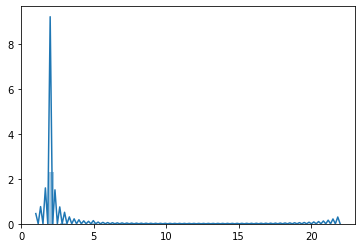

In [22]:
sns.distplot(extr_CP)

In [11]:
#test
extr_CP_t = df_test['ContractPeriod'].str.extract(r'(\d+)年間', expand=False).to_frame()
extr_CP_t=extr_CP_t.fillna(extr_CP_t.mode()['ContractPeriod'][0])#填入众数
extr_CP_t=pd.DataFrame(extr_CP_t,dtype='int')

In [12]:
extr_CP_t['ContractPeriod'].value_counts()

2     30541
5       270
3       225
1       152
4        60
7         9
6         4
15        1
Name: ContractPeriod, dtype: int64

### address

In [21]:
#東京都北区滝野川３丁目

extr = df_train['address'].str.extract(r'^東京都([一-龥]+区)', expand=False)
gu=pd.get_dummies(extr)
address_all=pd.DataFrame(gu,dtype='int')
address_all

,世田谷区,中央区,中野区,北区,千代田区,台東区,品川区,墨田区,大田区,文京区,...,江戸川区,江東区,渋谷区,港区,目黒区,練馬区,荒川区,葛飾区,豊島区,足立区
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#test
extr_t = df_test['address'].str.extract(r'^東京都([一-龥]+区)', expand=False)
gu_t=pd.get_dummies(extr_t)
address_all_t=pd.DataFrame(gu_t,dtype='int')
address_all_t

,世田谷区,中央区,中野区,北区,千代田区,台東区,品川区,墨田区,大田区,文京区,...,江戸川区,江東区,渋谷区,港区,目黒区,練馬区,荒川区,葛飾区,豊島区,足立区
id,,,,,,,,,,,,,,,,,,,,,
31471,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31478,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
31479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### RLDK

In [20]:
#RLDK
extr_RLDK = df_train['RLDK'].str.extract(r'^(\d)(\w+)', expand=False)

rooms_style=pd.get_dummies(extr_RLDK[1])
rooms=pd.merge(extr_RLDK[0],rooms_style,on='id')
rooms.rename(columns={0:'Room_number'}, inplace = True)

LDK_all=rooms_style['DK']*2+rooms_style['K']+rooms_style['LDK']*3+rooms_style['LK']*2
#把房型转换成房间数 R单独列
LDK=LDK_all.to_frame()
LDK.rename(columns={0:'LDK'}, inplace = True)

rooms_all=pd.merge(extr_RLDK[0],LDK,on="id")
rooms_all=pd.DataFrame(rooms_all,dtype='int')
rooms_all.rename(columns={0:'Room_number'}, inplace = True)
RLDK_all=rooms_all
RLDK_all

,Room_number,LDK
id,,
1,1,1
2,1,0
3,1,1
4,2,3
5,2,2
6,2,3
7,1,1
8,1,1
9,2,2


In [14]:
#test
extr_RLDK = df_test['RLDK'].str.extract(r'^(\d)(\w+)', expand=False)

rooms_style=pd.get_dummies(extr_RLDK[1])
rooms=pd.merge(extr_RLDK[0],rooms_style,on='id')
rooms.rename(columns={0:'Room_number'}, inplace = True)

LDK_all=rooms_style['DK']*2+rooms_style['K']+rooms_style['LDK']*3+rooms_style['LK']*2
#把房型转换成房间数 R单独列
LDK=LDK_all.to_frame()
LDK.rename(columns={0:'LDK'}, inplace = True)

rooms_all=pd.merge(extr_RLDK[0],LDK,on="id")
rooms_all=pd.DataFrame(rooms_all,dtype='int')
rooms_all.rename(columns={0:'Room_number'}, inplace = True)
RLDK_all_t=rooms_all
RLDK_all_t

,Room_number,LDK
id,,
31471,2,3
31472,1,0
31473,1,1
31474,1,1
31475,2,3
31476,1,0
31477,1,1
31478,1,0
31479,1,0


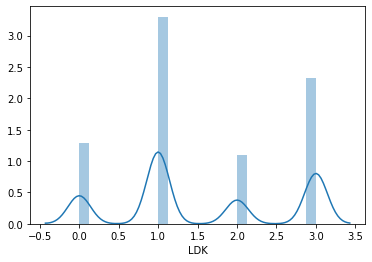

In [29]:
sns.distplot(RLDK_all['LDK'])

### AGE

In [25]:
#不同写法转换
df_train['age']=df_train['age'].replace('新築','0年0ヶ月')
#提取数字部分
extr_age = df_train['age'].str.extract(r'^([\d]+)年([\d]+)ヶ月', expand=False)

#数据化
extr_age=pd.DataFrame(extr_age,dtype='int')
#转换成月份
age_serise=extr_age[0]*12 +extr_age[1]
age_all=age_serise.to_frame()
age_all.rename(columns={0:'month'}, inplace = True)
age_all

,month
id,
1,117
2,538
3,102
4,352
5,379
6,90
7,125
8,172
9,536


In [15]:
#test

#不同写法转换
df_test['age']=df_test['age'].replace('新築','0年0ヶ月')
#提取数字部分
extr_age = df_test['age'].str.extract(r'^([\d]+)年([\d]+)ヶ月', expand=False)

#数据化
extr_age=pd.DataFrame(extr_age,dtype='int')
#转换成月份
age_serise=extr_age[0]*12 +extr_age[1]
age_all_t=age_serise.to_frame()
age_all_t.rename(columns={0:'month'}, inplace = True)
age_all_t

,month
id,
31471,588
31472,2
31473,280
31474,434
31475,544
31476,306
31477,212
31478,48
31479,157


In [16]:
#判断缺失值
for columname in extr_age.columns:
    if extr_age[columname].count() != len(extr_age):
        loc = extr_age[columname][extr_age[columname].isnull().values==True].index.tolist()
        print('列名："{}", 第{}行位置有缺失值'.format(columname,loc))


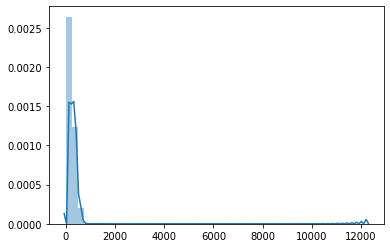

In [33]:
sns.distplot(age_all)

### direction

In [26]:
direction_all=pd.get_dummies(df_train['direction'])
direction_all

,北,北東,北西,南,南東,南西,東,西
id,,,,,,,,
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0


In [17]:
direction_all_t=pd.get_dummies(df_test['direction'])
direction_all_t

,北,北東,北西,南,南東,南西,東,西
id,,,,,,,,
31471,0,0,0,1,0,0,0,0
31472,0,0,0,0,1,0,0,0
31473,0,0,0,0,1,0,0,0
31474,0,0,0,0,1,0,0,0
31475,0,0,0,1,0,0,0,0
31476,0,0,0,0,0,0,0,1
31477,0,0,0,0,0,0,0,0
31478,1,0,0,0,0,0,0,0
31479,0,0,0,1,0,0,0,0


### area

In [27]:
extr_area = df_train['area'].str.extract(r'^(\S+)m2', expand=False).to_frame()

area_all=pd.DataFrame(extr_area,dtype='float')
area_all

,area
id,
1,20.01
2,16.50
3,22.05
4,60.48
5,39.66
6,50.80
7,23.82
8,32.32
9,65.59


In [18]:
extr_area = df_test['area'].str.extract(r'^(\S+)m2', expand=False).to_frame()

area_all_t=pd.DataFrame(extr_area,dtype='float')
area_all_t

,area
id,
31471,50.22
31472,20.88
31473,26.93
31474,23.57
31475,50.00
31476,21.45
31477,19.98
31478,24.44
31479,36.32


### floor

In [33]:
extr_floor_1 = df_train['floor'].str.extract(r'^(\d+)階／(\d+)階建', expand=False)
extr_floor_2= df_train['floor'].str.extract(r'(\d+)階建', expand=False)
extr_floor_3= df_train['floor'].str.extract(r'^地下(\d+)階', expand=False)
extr_floor_4= df_train['floor'].str.extract(r'^(\d+)階', expand=False)

extr_floor_3=pd.to_numeric(extr_floor_3)
extr_floor_3=extr_floor_3*(-1)#地下取负阶数

extr_floor_1[1]=extr_floor_1[1].combine_first(extr_floor_2)
extr_floor_1[0]=extr_floor_1[0].combine_first(extr_floor_3)
extr_floor_1[0]=extr_floor_1[0].combine_first(extr_floor_4)

extr_floor=extr_floor_1

extr_floor[0]=extr_floor[0].fillna(0)#已知总阶数不知道阶数的时候取0
help_extr_floor_1=pd.to_numeric(extr_floor[0])
extr_floor[1]=extr_floor[1].combine_first(help_extr_floor_1*2)#已知阶数不知道总阶数的时候，选择取二倍阶数作为总阶数。

floor_all=pd.DataFrame(extr_floor,dtype='int')
floor_all.rename(columns={0:'floor',1:'all_floor'}, inplace = True)
ratio=floor_all['floor']/floor_all['all_floor']
ratio=ratio.to_frame()
floor_all=pd.merge(floor_all,ratio,on='id')
floor_all.rename(columns={0:'ratio'}, inplace = True)

floor_all

,floor,all_floor,ratio
id,,,
1,1,12,0.083333
2,5,10,0.500000
3,12,15,0.800000
4,3,4,0.750000
5,1,2,0.500000
6,6,12,0.500000
7,6,8,0.750000
8,1,6,0.166667
9,4,9,0.444444


In [29]:
#test
extr_floor_1 = df_test['floor'].str.extract(r'^(\d+)階／(\d+)階建', expand=False)
extr_floor_2= df_test['floor'].str.extract(r'(\d+)階建', expand=False)
extr_floor_3= df_test['floor'].str.extract(r'^地下(\d+)階', expand=False)
extr_floor_4= df_test['floor'].str.extract(r'^(\d+)階', expand=False)

extr_floor_3=pd.to_numeric(extr_floor_3)
extr_floor_3=extr_floor_3*(-1)#地下取负阶数

extr_floor_1[1]=extr_floor_1[1].combine_first(extr_floor_2)
extr_floor_1[0]=extr_floor_1[0].combine_first(extr_floor_3)
extr_floor_1[0]=extr_floor_1[0].combine_first(extr_floor_4)

extr_floor=extr_floor_1

extr_floor[0]=extr_floor[0].fillna(0)#已知总阶数不知道阶数的时候取0
help_extr_floor_1=pd.to_numeric(extr_floor[0])
extr_floor[1]=extr_floor[1].combine_first(help_extr_floor_1*2)#已知阶数不知道总阶数的时候，选择取二倍阶数作为总阶数。

floor_all_t=pd.DataFrame(extr_floor,dtype='int')
floor_all_t.rename(columns={0:'floor',1:'all_floor'}, inplace = True)
ratio=floor_all_t['floor']/floor_all_t['all_floor']
ratio=ratio.to_frame()
floor_all_t=pd.merge(floor_all_t,ratio,on='id')
floor_all_t.rename(columns={0:'ratio'}, inplace = True)

floor_all_t=floor_all_t.fillna(0)
floor_all_t

,floor,all_floor,ratio
id,,,
31471,8,8,1.000000
31472,3,4,0.750000
31473,1,4,0.250000
31474,1,2,0.500000
31475,4,4,1.000000
31476,1,2,0.500000
31477,3,8,0.375000
31478,3,3,1.000000
31479,2,2,1.000000


In [30]:
for columname in floor_all_t.columns:
    if floor_all_t[columname].count() != len(floor_all_t):
        loc = floor_all_t[columname][floor_all_t[columname].isnull().values==True].index.tolist()
        print('列名："{}", 第{}行位置有缺失值'.format(columname,loc))


In [31]:
floor_all_t.loc[[40675]]

,floor,all_floor,ratio
id,,,
40675,0,0,0.0


### BuildingConstruction

In [32]:
extr_BC=pd.get_dummies(df_train['BuildingConstruction'])
BuildingConstruction_all=extr_BC
BuildingConstruction_all

,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄骨造
id,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0


In [33]:
#test
extr_BC=pd.get_dummies(df_test['BuildingConstruction'])
BuildingConstruction_all_t=extr_BC

BuildingConstruction_all_t['その他']=BuildingConstruction_all_t['その他']+BuildingConstruction_all_t['鉄筋ブロック']
del BuildingConstruction_all_t['鉄筋ブロック']
BuildingConstruction_all_t

,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄骨造
id,,,,,,,,,,
31471,0,0,0,0,0,0,0,0,0,1
31472,0,0,0,1,0,0,0,0,0,0
31473,0,0,0,0,0,0,0,0,0,1
31474,0,0,0,0,0,0,0,1,0,0
31475,0,0,0,1,0,0,0,0,0,0
31476,0,0,0,0,0,0,0,1,0,0
31477,0,0,0,1,0,0,0,0,0,0
31478,0,0,0,0,0,0,0,1,0,0
31479,0,0,0,0,0,0,0,1,0,0


# ALL
address_all <br>
BuildingConstruction_all <br>
direction_all <br>
access_station <br>
access_line <br>
 <br>
RLDK_all<br>
age_all <br>
floor_all <br>
area_all <br>
extr_CP <br>

In [ ]:
address_all

In [46]:
access_line["都営三田線"]


id
1        1
2        0
3        0
4        0
5        0
        ..
31466    3
31467    0
31468    0
31469    0
31470    0
Name: 都営三田線, Length: 31470, dtype: int64

In [35]:
#train_all_0=pd.concat([address_all,RLDK_all,age_all,direction_all,floor_all,BuildingConstruction_all,extr_CP,area_all],axis=1)
test_all_0=pd.concat([address_all_t,RLDK_all_t,age_all_t,direction_all_t,floor_all_t,BuildingConstruction_all_t,extr_CP_t,area_all_t],axis=1)

In [38]:
train_all_0.columns == test_all_0.columns

Index(['世田谷区', '中央区', '中野区', '北区', '千代田区', '台東区', '品川区', '墨田区', '大田区', '文京区',
       '新宿区', '杉並区', '板橋区', '江戸川区', '江東区', '渋谷区', '港区', '目黒区', '練馬区', '荒川区',
       '葛飾区', '豊島区', '足立区', 'Room_number', 'LDK', 'month', '北', '北東', '北西',
       '南', '南東', '南西', '東', '西', 'floor', 'all_floor', 'ratio',
       'ALC（軽量気泡コンクリート）', 'HPC（プレキャスト・コンクリート（重量鉄骨））',
       'PC（プレキャスト・コンクリート（鉄筋コンクリート））', 'RC（鉄筋コンクリート）', 'SRC（鉄骨鉄筋コンクリート）', 'その他',
       'ブロック', '木造', '軽量鉄骨', '鉄骨造', 'ContractPeriod', 'area'],
      dtype='object')

In [39]:
#输出csv文件
train_all_0.to_csv('train_all_0.csv',index=True)
test_all_0.to_csv('test_all_0.csv',index=True)

In [40]:
#读取csv
train_all_0=pd.read_csv('train_all_0.csv',index_col=0)
test_all_0=pd.read_csv('test_all_0.csv',index_col=0)

In [41]:
temp = test_all_0.isnull().any() #列中是否存在空值
print(type(temp))
print(temp)

<class 'pandas.core.series.Series'>
世田谷区                           False
中央区                            False
中野区                            False
北区                             False
千代田区                           False
台東区                            False
品川区                            False
墨田区                            False
大田区                            False
文京区                            False
新宿区                            False
杉並区                            False
板橋区                            False
江戸川区                           False
江東区                            False
渋谷区                            False
港区                             False
目黒区                            False
練馬区                            False
荒川区                            False
葛飾区                            False
豊島区                            False
足立区                            False
Room_number                    False
LDK                            False
month                          False
北 

# PCA

In [42]:
access_all=pd.merge(access_station,access_line,on='id')
access_all_t=pd.merge(access_station_t,access_line_t,on='id')

In [43]:
#z-score 标准化 access 562维
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(access_all)#标准化的mean var
print(scaler)
print(scaler.mean_)
print(scaler.var_)
access_scaled_train=scaler.transform(access_all)#标准化结果向量
print(access_scaled_train)
#np.shape(access_scaled_train)

access_scaled_test=scaler.transform(access_all_t)
print(access_scaled_test)
#np.shape(access_scaled_test)#相同标准 标准化测试集

StandardScaler(copy=True, with_mean=True, with_std=True)
[1.30282809e-03 2.02414998e-02 1.37273594e-02 1.51255164e-02
 1.65236733e-02 9.81887512e-03 3.36510963e-02 1.47124245e-02
 2.38322212e-02 3.71782650e-03 4.43914840e-02 6.80012711e-03
 1.01684144e-02 9.46933588e-03 1.85255799e-02 1.63330156e-02
 1.28693994e-02 9.62821735e-03 4.70289164e-03 1.27422942e-02
 1.46170956e-02 8.42071814e-03 1.40133460e-02 2.16078805e-02
 3.16174134e-02 1.13759136e-02 1.36002542e-02 1.73816333e-02
 1.72227518e-02 2.09405783e-02 1.06132825e-02 9.43755958e-03
 2.97108357e-02 1.15347950e-02 1.44264379e-02 1.72545281e-02
 2.18620909e-02 1.94470925e-02 2.64696536e-02 2.04003813e-02
 2.47855100e-02 3.20940578e-02 1.54432793e-02 7.24499523e-03
 1.30600572e-02 8.64315221e-03 7.88052113e-03 9.53288847e-03
 1.97013028e-02 2.48172863e-02 8.32538926e-03 2.15443279e-02
 2.67238640e-02 1.26787417e-02 2.54528122e-02 6.35525898e-04
 1.86526851e-02 1.51890690e-02 1.74451859e-02 1.75087385e-02
 6.57769304e-03 9.91420400e-

  -0.01260582]]
[[-0.02004458 -0.0901055  -0.06637455 ... -0.00797224 -0.00976412
  -0.01260582]
 [-0.02004458 -0.0901055  -0.06637455 ... -0.00797224 -0.00976412
  -0.01260582]
 [-0.02004458 -0.0901055  -0.06637455 ... -0.00797224 -0.00976412
  -0.01260582]
 ...
 [-0.02004458 -0.0901055  -0.06637455 ... -0.00797224 -0.00976412
  -0.01260582]
 [-0.02004458 -0.0901055  -0.06637455 ... -0.00797224 -0.00976412
  -0.01260582]
 [-0.02004458 -0.0901055  -0.06637455 ... -0.00797224 -0.00976412
  -0.01260582]]


In [44]:
np.shape(access_scaled_test)

(31262, 562)

In [45]:
#PCA特征选择 选出406维向量
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
acc_pca_train=pca.fit_transform(access_scaled_train)
acc_pca_test=pca.transform(access_scaled_test)
pca.explained_variance_ratio_
print(acc_pca_train)
print(acc_pca_test)

np.shape(pca.explained_variance_ratio_)

[[ 1.39403375e+00 -2.42505996e+00 -4.49437984e+00 ... -8.83347610e-02
   2.33655381e-01 -3.58642519e-02]
 [-1.00121151e+00  1.92913558e-01 -2.23135782e+00 ...  1.03600760e-01
  -8.45086350e-04  3.64210002e-02]
 [-1.27048851e-01 -1.55320423e-02  1.47476304e+00 ...  2.23203179e-02
  -1.52984080e-01 -7.42594893e-02]
 ...
 [-1.33092903e+00  1.20629013e+00  6.38260962e-02 ...  1.02757634e-01
   4.21987621e-02 -5.93163234e-03]
 [-2.25548404e+00  2.28327712e+00  7.71401351e-01 ...  2.11918249e-01
  -2.13616904e-01 -3.03259534e-02]
 [-7.73350444e-01 -2.59568725e-01 -2.67405341e+00 ... -1.12087921e-01
  -5.47906088e-02 -1.52679455e-02]]
[[ 4.39705520e-01 -1.56366931e+00  2.88685947e+00 ... -1.37281658e-01
   3.05790748e-01 -2.78091746e+00]
 [ 5.11786001e-01 -1.90138110e+00  2.94891528e+00 ... -6.01725169e-02
   8.62182781e-01 -2.92926922e-01]
 [ 4.52381877e-01 -2.08296115e+00 -3.95952763e+00 ... -1.47652154e-01
  -6.51329809e-02 -9.92881538e-02]
 ...
 [-1.29873550e+00  6.41536610e-01 -1.3484808

(406,)

In [46]:
#把pca之后的部分重新DF化 406维
acc_pca_train_df=pd.DataFrame(acc_pca_train,index=range(1,31471),columns=range(1,407))
acc_pca_train_df.index.name = 'id'
#acc_pca_train_df

acc_pca_test_df=pd.DataFrame(acc_pca_test,index=range(31471,62733),columns=range(1,407))
acc_pca_test_df.index.name = 'id'
acc_pca_test_df

,1,2,3,4,5,6,7,8,9,10,...,397,398,399,400,401,402,403,404,405,406
id,,,,,,,,,,,,,,,,,,,,,
31471,0.439706,-1.563669,2.886859,2.457511,0.599518,-1.694717,-0.843369,-1.067786,-2.975376,-3.046322,...,-0.383721,0.225160,-0.149121,0.186420,-0.243499,-0.009345,-0.219960,-0.137282,0.305791,-2.780917
31472,0.511786,-1.901381,2.948915,0.880258,1.253064,-2.859232,-1.944730,-0.360820,-1.962810,-4.539415,...,0.027932,-1.260144,0.017989,0.452346,-0.881896,0.080691,0.222115,-0.060173,0.862183,-0.292927
31473,0.452382,-2.082961,-3.959528,0.669883,-0.959463,0.704863,-3.940546,-0.474106,-1.147783,0.927036,...,-0.031670,-0.384592,0.053180,0.311183,0.150687,-0.027841,0.055545,-0.147652,-0.065133,-0.099288
31474,-0.454103,0.311770,1.112790,2.839259,-1.190529,1.093948,0.297414,-0.480660,2.969900,0.890799,...,-0.592508,0.139187,1.213678,0.257365,0.059132,0.016607,1.077806,-0.322628,0.219040,0.072725
31475,-1.371399,1.319441,0.510782,0.364321,-1.876332,0.834969,-0.884610,-0.230953,2.975468,-1.446590,...,-0.542100,-0.129057,0.057179,-0.120067,-0.148027,-0.026472,-0.253556,0.084807,0.078899,0.037460
31476,-2.037444,1.538298,-0.562356,0.434211,-1.824582,-0.632189,0.647655,0.537794,3.397825,-1.452640,...,-0.436030,-0.277011,-1.248404,-0.206743,-0.053413,-0.030708,-0.787778,0.356510,-0.329252,-0.019157
31477,0.016683,-1.561418,-2.045769,-0.856644,1.407410,-0.880144,-0.391444,-1.950523,0.961449,-1.081100,...,0.053411,-0.420824,-0.026930,-0.061228,-0.209191,-0.071648,-0.039437,0.043478,-0.028632,0.017246
31478,-0.844482,0.609301,0.248616,2.494277,-0.872695,0.352762,1.181683,0.325032,3.930930,0.354652,...,0.694234,-0.086020,-0.024891,0.100217,-0.143447,-0.021044,-0.552195,0.160154,-0.182831,0.062840
31479,-2.685328,3.678278,1.920848,-2.142959,-1.302532,2.120069,-2.131156,-0.407303,-1.033841,-0.307280,...,0.009351,-0.256657,-0.107109,0.748775,0.626845,0.475642,-0.230383,-0.076699,0.337822,0.021529


In [47]:
#z-score 标准化 其他特征
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(train_all_0)#标准化的mean var
print(scaler)
print(scaler.mean_)
print(scaler.var_)
train_all_0_scaled=scaler.transform(train_all_0)#标准化结果向量
print(train_all_0_scaled)
#np.shape(access_scaled_train)

test_all_0_scaled=scaler.transform(test_all_0)
print(test_all_0_scaled)
#np.shape(access_scaled_test)#相同标准 标准化测试集

StandardScaler(copy=True, with_mean=True, with_std=True)
[9.60597394e-02 4.06418812e-02 3.84810931e-02 3.32062282e-02
 1.45217668e-02 2.96155068e-02 4.04194471e-02 3.20940578e-02
 6.35525898e-02 2.83444550e-02 3.88624086e-02 5.62122656e-02
 5.16047029e-02 5.40832539e-02 4.79186527e-02 3.12996505e-02
 4.80775342e-02 3.25071497e-02 5.56720686e-02 1.83031459e-02
 3.85128694e-02 4.03876708e-02 6.96218621e-02 1.30104862e+00
 1.55433746e+00 1.94336543e+02 6.24721957e-02 4.19764855e-02
 4.21353670e-02 2.83095011e-01 9.84429616e-02 9.78709882e-02
 1.58722593e-01 1.27931363e-01 3.91912933e+00 6.87565936e+00
 6.26831466e-01 9.43755958e-03 1.27105180e-04 1.46170956e-03
 5.56244042e-01 7.71846203e-02 4.32157610e-03 9.53288847e-05
 1.75150937e-01 5.75786463e-02 1.18398475e-01 2.03565300e+00
 3.48086477e+01]
[8.68322659e-02 3.89901187e-02 3.70002986e-02 3.21035746e-02
 1.43108851e-02 2.87384286e-02 3.87857154e-02 3.10640293e-02
 5.95136581e-02 2.75410469e-02 3.73521218e-02 5.30524468e-02
 4.89416575

In [48]:
np.shape(test_all_0_scaled)

(31262, 49)

In [49]:
#把标准化之后的部分重新DF化 49维
train_all_0_df=pd.DataFrame(train_all_0_scaled,index=range(1,31471),columns=range(407,456))
train_all_0_df.index.name = 'id'
train_all_0_df

test_all_0_df=pd.DataFrame(test_all_0_scaled,index=range(31471,62733),columns=range(407,456))
test_all_0_df.index.name = 'id'
test_all_0_df

,407,408,409,410,411,412,413,414,415,416,...,446,447,448,449,450,451,452,453,454,455
id,,,,,,,,,,,,,,,,,,,,,
31471,3.067603,-0.205824,-0.200053,-0.185329,-0.121391,-0.174698,-0.205236,-0.182094,-0.26051,-0.170796,...,-0.03826,-1.119594,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,2.728746,-0.093518,0.819145
31472,-0.325987,-0.205824,-0.200053,-0.185329,-0.121391,-0.174698,-0.205236,-0.182094,-0.26051,-0.170796,...,-0.03826,0.893181,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,-0.366469,-0.093518,-0.740336
31473,-0.325987,-0.205824,-0.200053,-0.185329,-0.121391,-0.174698,-0.205236,-0.182094,-0.26051,-0.170796,...,-0.03826,-1.119594,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,2.728746,-0.093518,-0.418766
31474,-0.325987,-0.205824,-0.200053,-0.185329,-0.121391,-0.174698,-0.205236,-0.182094,-0.26051,-0.170796,...,-0.03826,-1.119594,-0.289206,-0.065881,-0.009764,2.170106,-0.247177,-0.366469,-0.093518,-0.597357
31475,-0.325987,-0.205824,-0.200053,-0.185329,-0.121391,-0.174698,-0.205236,-0.182094,-0.26051,-0.170796,...,-0.03826,0.893181,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,-0.366469,-0.093518,0.807452
31476,-0.325987,-0.205824,-0.200053,-0.185329,-0.121391,-0.174698,-0.205236,-0.182094,-0.26051,-0.170796,...,-0.03826,-1.119594,-0.289206,-0.065881,-0.009764,2.170106,-0.247177,-0.366469,-0.093518,-0.710040
31477,-0.325987,-0.205824,-0.200053,-0.185329,-0.121391,-0.174698,-0.205236,-0.182094,-0.26051,-0.170796,...,-0.03826,0.893181,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,-0.366469,-0.093518,-0.788173
31478,-0.325987,-0.205824,-0.200053,-0.185329,-0.121391,-0.174698,-0.205236,-0.182094,-0.26051,-0.170796,...,-0.03826,-1.119594,-0.289206,-0.065881,-0.009764,2.170106,-0.247177,-0.366469,-0.093518,-0.551115
31479,-0.325987,-0.205824,-0.200053,-0.185329,-0.121391,-0.174698,-0.205236,-0.182094,-0.26051,-0.170796,...,-0.03826,-1.119594,-0.289206,-0.065881,-0.009764,2.170106,-0.247177,-0.366469,-0.093518,0.080331


id
1         75000
2         76000
3        110000
4        150000
5         74000
          ...  
31466     80000
31467     54500
31468    125000
31469     98000
31470     81000
Name: SalePrice, Length: 31470, dtype: int64

In [91]:
type(access_scaled_train)

numpy.ndarray

In [51]:
train_all=pd.merge(acc_pca_train_df,train_all_0_df,on='id')

test_all=pd.merge(acc_pca_test_df,test_all_0_df,on='id')

In [53]:
#输出csv文件
train_all=pd.merge(df_train['SalePrice'],train_all,on='id')
train_all

,SalePrice,1,2,3,4,5,6,7,8,9,...,446,447,448,449,450,451,452,453,454,455
id,,,,,,,,,,,,,,,,,,,,,
1,75000,1.394034,-2.425060,-4.494380,0.282402,-0.867155,1.899343,-4.485038,-1.341032,-0.487792,...,-0.03826,0.893181,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,-0.366469,-0.093518,-0.786579
2,76000,-1.001212,0.192914,-2.231358,-0.051790,1.054576,-2.614553,2.663564,0.665845,-0.666811,...,-0.03826,-1.119594,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,2.728746,-0.093518,-0.973142
3,110000,-0.127049,-0.015532,1.474763,4.125346,-1.007752,1.383214,0.874454,-0.535387,3.488458,...,-0.03826,0.893181,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,-0.366469,-0.093518,-0.678148
4,150000,-2.783435,2.949301,1.156512,-0.780286,-3.044293,1.413493,-1.871347,-0.486798,3.341492,...,-0.03826,0.893181,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,-0.366469,-0.093518,1.364485
5,74000,0.717977,1.327467,1.305402,0.528444,5.640441,6.117349,-1.807658,9.854809,-3.357090,...,-0.03826,-1.119594,-0.289206,-0.065881,-0.009764,2.170106,-0.247177,-0.366469,-0.093518,0.257859
6,160000,1.489883,0.237927,-1.936949,-0.606541,5.766340,1.043410,1.799015,-0.486985,2.113242,...,-0.03826,0.893181,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,-0.366469,-0.093518,0.849973
7,78500,-0.420781,-0.099468,-1.072790,0.809844,-1.167475,-1.118867,0.253837,2.612746,-0.223260,...,-0.03826,0.893181,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,-0.366469,-0.093518,-0.584069
8,115000,0.350251,-1.228322,1.845898,1.193493,1.081150,-1.809997,-1.099791,-0.422027,-1.302100,...,-0.03826,0.893181,-0.289206,-0.065881,-0.009764,-0.460807,-0.247177,-0.366469,-0.093518,-0.132277
9,184327,0.655553,-1.139595,-2.281778,0.026600,1.351006,1.893877,-1.446154,-0.971503,1.551801,...,-0.03826,-1.119594,3.457738,-0.065881,-0.009764,-0.460807,-0.247177,-0.366469,-0.093518,1.636092


In [54]:
train_all.to_csv('train_all.csv',index=True)
test_all.to_csv('test_all.csv',index=True)

In [99]:
access_station.columns

Index(['お台場海浜公園駅', 'お花茶屋駅', 'とうきょうスカイツリー駅', 'ときわ台駅', '一之江駅', '三ノ輪橋駅', '三ノ輪駅',
       '三河島駅', '三田駅', '三越前駅',
       ...
       '新丸子駅', '新座駅', '有明駅', '有楽町駅', '流通センター駅', '田無駅', '舞浜駅', '荒川二丁目駅', '行徳駅',
       '西武柳沢駅'],
      dtype='object', length=516)

In [52]:
#z-score 标准化
scaler=StandardScaler(with_mean=False).fit(xishu_all)#标准化的var
print(scaler)
print(scaler.mean_)
print(scaler.var_)
xishu_scaled_train=scaler.transform(xishu_all)#标准化结果向量
print(xishu_scaled_train)
np.shape(xishu_scaled_train)

#dg_scaled_test=scaler.transform(dg_test)
#print(dg_scaled_test)
#np.shape(dg_scaled_test)#相同标准 标准化测试集

StandardScaler(copy=True, with_mean=False, with_std=True)
[9.60597394e-02 4.06418812e-02 3.84810931e-02 3.32062282e-02
 1.45217668e-02 2.96155068e-02 4.04194471e-02 3.20940578e-02
 6.35525898e-02 2.83444550e-02 3.88624086e-02 5.62122656e-02
 5.16047029e-02 5.40832539e-02 4.79186527e-02 3.12996505e-02
 4.80775342e-02 3.25071497e-02 5.56720686e-02 1.83031459e-02
 3.85128694e-02 4.03876708e-02 6.96218621e-02 9.43755958e-03
 1.27105180e-04 1.46170956e-03 5.56244042e-01 7.71846203e-02
 4.32157610e-03 9.53288847e-05 1.75150937e-01 5.75786463e-02
 1.18398475e-01 6.24721957e-02 4.19764855e-02 4.21353670e-02
 2.83095011e-01 9.84429616e-02 9.78709882e-02 1.58722593e-01
 1.27931363e-01 1.30282809e-03 2.02414998e-02 1.37273594e-02
 1.51255164e-02 1.65236733e-02 9.81887512e-03 3.36510963e-02
 1.47124245e-02 2.38322212e-02 3.71782650e-03 4.43914840e-02
 6.80012711e-03 1.01684144e-02 9.46933588e-03 1.85255799e-02
 1.63330156e-02 1.28693994e-02 9.62821735e-03 4.70289164e-03
 1.27422942e-02 1.46170956e

(31470, 633)

In [56]:
np.shape(xishu_scaled_train)


(31470, 633)

In [ ]:
df_train.loc[[123]]#489 

In [ ]:
type(df_train['建物構造'])

In [ ]:
df_train.describe()

In [ ]:
df_train.info()

In [ ]:
df_train['SalePrice'].describe()

In [ ]:
sns.distplot(df_train['賃料'])

In [ ]:
#correlation matrix
f, ax=plt.subplots(figsize=(15,12))
sns.heatmap(df_train.corr(),vmax=0.8,square=True)

In [ ]:
# #Saleprice correlation matrix
# k=10
# cols=df_train.corr().nlargest(k,'SalePrice')['SalePrice'].index
# cm=np.corrcoef(df_train[cols].values.T)
# sns.set(font_scale=1.25)
# sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},
#             yticklabels=cols.values,xticklabels=cols.values)

以下用所有特征进行训练

In [ ]:
train_df=pd.read_csv('train.csv',index_col=0)
test_df=pd.read_csv('test.csv',index_col=0)

In [ ]:
y_train=np.log1p(train_df.pop('SalePrice'))
sns.distplot(y_train)

In [ ]:
all_df=pd.concat((train_df,test_df),axis=0)
all_df.shape

In [ ]:
all_df.head()

In [ ]:
all_df['MSSubClass'].value_counts()

In [ ]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head()

In [ ]:
all_dummy_df=pd.get_dummies(all_df)
all_dummy_df.head()

In [ ]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

In [ ]:
mean_cols=all_dummy_df.mean()
mean_cols.head(10)

In [ ]:
all_dummy_df=all_dummy_df.fillna(mean_cols)
all_dummy_df.isnull().sum().sum()

In [ ]:
numeric_cols=all_df.columns[all_df.dtypes !='object']
numeric_cols

In [ ]:
numeric_col_mean=all_dummy_df.loc[: ,numeric_cols].mean()
numeric_col_std=all_dummy_df.loc[: ,numeric_cols].std()
all_dummy_df.loc[: ,numeric_cols]=(all_dummy_df.loc[: ,numeric_cols]-numeric_col_mean)/numeric_col_std

建模开始

In [ ]:
dummy_train_df=all_dummy_df.loc[train_df.index]
dummy_test_df=all_dummy_df.loc[test_df.index]

In [ ]:
dummy_train_df.shape,dummy_test_df.shape

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
alphas = np.logspace(-3,2,50)
alphas

In [ ]:
X_train=dummy_train_df.values
X_test=dummy_test_df.values
test_scores=[]
for alpha in alphas:
    clf = Ridge(alpha)
    test_score=np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [ ]:
plt.plot(alphas,test_scores)
plt.title('alpha vs cv Error')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
N_estimators=[20,50,100,150,200,260,300]
test_scores=[]
for N in N_estimators:
    clf=RandomForestRegressor(n_estimators=N,max_features=0.3)
    test_score=np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [ ]:
plt.plot(N_estimators,test_scores)
plt.title('N_estimators vc CV Error')

In [ ]:
ridge=Ridge(alpha=15)
rf=RandomForestRegressor(n_estimators=350,max_features=0.3)
ridge.fit(X_train,y_train)
rf.fit(X_train,y_train)

In [ ]:
ridge_predict=ridge.predict(X_test)
rf_predict=rf.predict(X_test)
test_score=rf.score(X_train,y_train)
print(test_score)
y_ridge=np.expm1(ridge_predict)
y_rf=np.expm1(rf_predict)

In [ ]:
y_final=(y_ridge+y_rf)/2
y_final

In [ ]:
submission_df=pd.DataFrame(data={'Id':test_df.index,'SalePrice':y_final})

In [ ]:
submission_df.head()

In [ ]:
submission_df.to_csv('ensenbl_ridge_randomForest.csv',header=False,index=False)

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris)
len(iris)

In [ ]:
iris_X = iris.data
print(iris_X)
type(iris_X)


In [ ]:

iris_Y = iris.target
print(iris_Y)
type(iris_Y)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold